In [1]:
# for later...
import pandas as pd
df = pd.DataFrame([
    {"x":2, "y":5, "a": 90},
    {"x":3, "y":1, "a": 0},
    {"x":6, "y":6, "a": 45},
    {"x":8, "y":1, "a": 180}
])
df

,x,y,a
0,2,5,90
1,3,1,0
2,6,6,45
3,8,1,180


# Coordinate Systems

In [2]:
import matplotlib.pyplot as plt

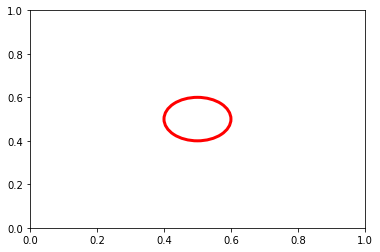

In [3]:
fig, ax = plt.subplots()
p = plt.Circle((0.5,0.5), 0.1,
               facecolor="none", edgecolor="red", linewidth=3)
ax.add_artist(p)

In [4]:
type(p).__mro__

(matplotlib.patches.Circle,
 matplotlib.patches.Ellipse,
 matplotlib.patches.Patch,
 matplotlib.artist.Artist,
 object)

In [5]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

1.1727272727272728 1.406


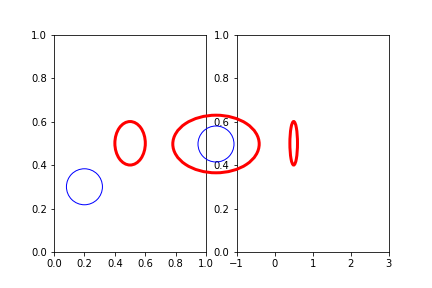

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 4))
ax2.set_xlim(-1, 3)

def relative_circle(area, x, y):
    p = plt.Circle((x,y), 0.1,
                   facecolor="none", edgecolor="red", linewidth=3)
    area.add_artist(p)

# circles on ax
relative_circle(ax1, 0.5, 0.5)
relative_circle(ax2, 0.5, 0.5)

# circle on fig (0,0 is bottom left, 1,1 is top right)
relative_circle(fig, 0.5, 0.5)

# true circle centered on figure
def absolute_circle(area, x, y):
    p = plt.Circle((x,y), 0.25,
                   facecolor="none", edgecolor="blue", linewidth=1,
                   transform=fig.dpi_scale_trans)
    area.add_artist(p)
    
# truly round circle at point 0.2,0.3 on the left plot?
x,y = ax1.transData.transform((0.2,0.3)) / fig.dpi # absolute coordinates, in "dots"/pixels
print(x,y)
absolute_circle(fig, x, y)

absolute_circle(fig,3,2)

In [7]:
fig.dpi # dots per inch

72.0

# Custom Scatter Plot of Arrows (Like the Airports)

In [8]:
# for now...
import pandas as pd
df = pd.DataFrame([
    {"x":2, "y":5, "a": 90},
    {"x":3, "y":1, "a": 0},
    {"x":6, "y":6, "a": 45},
    {"x":8, "y":1, "a": 180}
])
df

,x,y,a
0,2,5,90
1,3,1,0
2,6,6,45
3,8,1,180


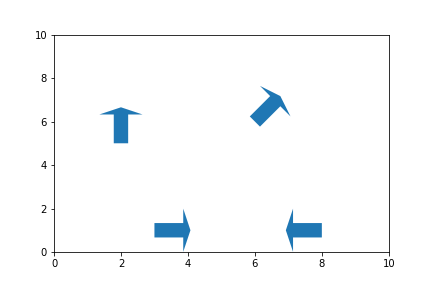

In [9]:
import math

fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

for tup in df.itertuples():
    a = math.radians(tup.a)
    x,y = ax.transData.transform((tup.x, tup.y)) / fig.dpi
    c = plt.Arrow(x, y, math.cos(a)*0.5, math.sin(a)*0.5, transform=fig.dpi_scale_trans)
    ax.add_artist(c)

# Example: Annotated Plot

In [10]:
df = pd.DataFrame({
    "A": [1,2,8,9],
    "B": [5,7,12,13],
}, index=[10, 20, 30, 40])
df

,A,B
10,1,5
20,2,7
30,8,12
40,9,13


In [11]:
plt.rcParams["font.size"] = 16

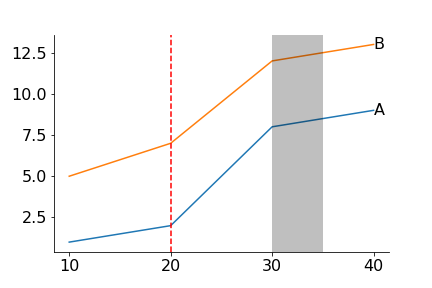

In [43]:
ax = df.plot.line(legend=False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# 1. text on lines
for colname in df.columns:
    ax.text(df.index[-1], df[colname].values[-1], colname, va="center")

# 2. vertical line (marking some event)
ylim = ax.get_ylim()
patch = plt.Line2D((20, 20), ylim, color="red", linestyle="--")
ax.add_artist(patch)

# 3. a highlighted region
patch = plt.Rectangle((30, ylim[0]), 5, ylim[1]-ylim[0],
                      color="black", zorder=10, alpha=0.25,
                      linestyle="")
ax.add_artist(patch)

In [13]:
df

,A,B
10,1,5
20,2,7
30,8,12
40,9,13
